# Sentiment Analysis of Airline Tweets Using Machine Learning

## Project Overview

This project performs sentiment analysis on tweets related to various airlines. By using Natural Language Processing (NLP) techniques and machine learning models, we aim to classify each tweet as having a **positive**, **neutral**, or **negative** sentiment.

### Objectives:
- Preprocess and clean the tweet data.
- Extract meaningful features using the TF-IDF method.
- Handle class imbalance using Random Oversampling or SMOTE techniques.
- Experiment with multiple machine learning models (Logistic Regression, Naive Bayes, SVM, Random Forest) to classify sentiments.
- Select the best-performing model based on accuracy and other performance metrics.

### Dataset:

The dataset used for this project is the **Airline Tweets Sentiment Dataset**. It contains approximately 14,000 tweets related to various airlines, classified into three sentiment categories: **negative**, **neutral**, and **positive**.

You can access the dataset at the following link:
- [Airline Tweets Sentiment Dataset on Kaggle](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)

### Methodology:
We will follow these steps in this project:
1. Data Preprocessing
2. Feature Extraction with TF-IDF
3. Handling Class Imbalance
4. Model Selection and Evaluation
5. Conclusions and Future Work


## Step 1: Data Exploration and Preprocessing

### 1.1 Data Exploration

We begin by loading the airline tweets dataset to explore its structure and contents. The dataset contains columns such as the tweet text, the airline the tweet is directed at, and the sentiment label (positive, neutral or negative).

In [1]:
# Load the dataset
import pandas as pd

# Load the csv file into a DataFrame
tweets = pd.read_csv('Tweets.csv')

# Display the first few rows of the dataset
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### 1.2 Text Preprocessing

Before feeding the tweet data into the machine learning model, we need to clean and preprocess the text. The following steps are applied:
- **Remove URLs**: Links in the tweets are not relevant for sentiment analysis.
- **Remove Mentions and Hashtags**: These often do not contribute to sentiment meaning.
- **Remove Special Characters**: This step simplifies the text.
- **Lowercasing**: To ensure uniformity, we convert all characters to lowercase.

In [3]:
import re
import nltk

# Define the text cleaning function
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove mentions (@) and hashtags (#)
    text = re.sub(r'\@\w+|\#', '', text)
    
    # Remove special characters, keep letters and spaces
    text = re.sub(r'[^A-Za-z\s\']', '', text)
    
    # Handle certain contractions
    text = re.sub(r"'\b(?!t\b)\w+", '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    return text

# Apply the cleaning function to the text column
tweets['cleaned_text'] = tweets['text'].apply(clean_text)

# Display the original and cleaned text
tweets[['text', 'cleaned_text']].head()

,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus you added commercials to the experience ...
2,@VirginAmerica I didn't today... Must mean I n...,i didn't today must mean i need to take anoth...
3,@VirginAmerica it's really aggressive to blast...,it really aggressive to blast obnoxious enter...
4,@VirginAmerica and it's a really big bad thing...,and it a really big bad thing about it


### 1.3 Tokenization and Stopword Removal

After cleaning the text, we further process the text by tokenizing it (splitting it into individual words) and removing common English stopwords (such as 'the', 'and', 'is') that do not carry much meaning for sentiment analysis.

In [4]:
# Download stopwords if needed
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Set up English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords and unwanted tokens like "'ve", "'s"
def remove_stopwords(tokens):
    unwanted_tokens = ["'ve", "'s", "'re", "'ll", "'d", "'m"]
    return [word for word in tokens if word not in stop_words and word not in unwanted_tokens and len(word) > 1]

# Tokenize the cleaned text
tweets['tokenized_text'] = tweets['cleaned_text'].apply(nltk.word_tokenize)

# Apply stopword removal on tokenized text
tweets['cleaned_tokens'] = tweets['tokenized_text'].apply(remove_stopwords)

# Display the tokenized and cleaned text
tweets[['cleaned_text', 'cleaned_tokens']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ardaakbulak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_text,cleaned_tokens
0,what said,[said]
1,plus you added commercials to the experience ...,"[plus, added, commercials, experience, tacky]"
2,i didn't today must mean i need to take anoth...,"[n't, today, must, mean, need, take, another, ..."
3,it really aggressive to blast obnoxious enter...,"[really, aggressive, blast, obnoxious, enterta..."
4,and it a really big bad thing about it,"[really, big, bad, thing]"


### 1.4 Joining Tokens Back into Sentences

After tokenizing and cleaning the text, we join the tokens back into a single string for each tweet. This step is necessary before applying TF-IDF, which works on complete text rather than individual tokens.

In [5]:
# Join the cleaned tokens back into a single string
tweets['final_text'] = tweets['cleaned_tokens'].apply(lambda tokens: ' '.join(tokens))

# Display the final cleaned text
tweets[['cleaned_text', 'cleaned_tokens', 'final_text']].head()

,cleaned_text,cleaned_tokens,final_text
0,what said,[said],said
1,plus you added commercials to the experience ...,"[plus, added, commercials, experience, tacky]",plus added commercials experience tacky
2,i didn't today must mean i need to take anoth...,"[n't, today, must, mean, need, take, another, ...",n't today must mean need take another trip
3,it really aggressive to blast obnoxious enter...,"[really, aggressive, blast, obnoxious, enterta...",really aggressive blast obnoxious entertainmen...
4,and it a really big bad thing about it,"[really, big, bad, thing]",really big bad thing


### Why We Manually Preprocessed and Joined Tokens

In text processing, tools like **TfidfVectorizer** can perform tokenization and stopword removal automatically. However, in this project, we opted for manual preprocessing and joining the tokens back into a single string for the following reasons:

1. **Custom Stopword Handling**:
   - We wanted more control over which words to remove. For example, common stopwords like "the" and "is" were removed, but we intentionally kept contractions like **"n’t"** (e.g., "isn’t", "don’t") since they carry important sentiment meaning.
   
2. **Custom Tokenization**:
   - By using **NLTK’s word tokenization**, we had more control over how the text was split into individual tokens. This allowed us to handle special cases (e.g., handling apostrophes and contractions) effectively before joining the tokens back together.

3. **Cleaning Special Characters**:
   - Manual preprocessing steps allowed us to remove special characters, URLs, and mentions (like `@username`), which may not have been effectively handled by TF-IDF’s built-in preprocessing.

4. **Uniform Text**:
   - By joining the cleaned tokens into sentences, we ensured that the text was clean and uniform before it was fed into the **TF-IDF** vectorizer.

Handling these steps manually ensured that our preprocessing pipeline was more tailored to the sentiment analysis task.

## Step 2: Feature Extraction (TF-IDF)

### 2.1 TF-IDF (Term Frequency-Inverse Document Frequency)
In this step, we convert the cleaned tweet text into numerical features using the TF-IDF method. TF-IDF helps us assign weights to words based on how frequently they appear in the text (Term Frequency) and how unique they are across all tweets (Inverse Document Frequency).

This process helps the model focus on important words that distinguish between tweets, improving its ability to capture meaningful patterns in the text.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer to include unigrams and bigrams
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the final cleaned text to create the TF-IDF matrix
X = tfidf_vectorizer.fit_transform(tweets['final_text'])

# Display the shape of the TF-IDF matrix
print("TF-IDF matrix shape:", X.shape)

# Extract the feature names (words and phrases) for reference
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the first 10 feature names
print("Sample of features (words or n-grams):", feature_names[:10])

TF-IDF matrix shape: (14640, 12311)
Sample of features (words or n-grams): ['aa' 'aaaand' 'aaadvantage' 'aaalwayslate' 'aaba' 'aacom' 'aadavantage'
 'aadelay' 'aadfw' 'aadv']


### Unigram vs Bigram Comparison

In this project, we experimented with both **unigrams** and **bigrams** during the TF-IDF feature extraction step. While **unigrams** focus on individual words, **bigrams** capture two-word combinations, which can provide additional context.

For example:
- **Unigram**: "not", "good"
- **Bigram**: "not good"

Including bigrams adds more context but increases the number of features in the model, which can make training slower or lead to overfitting. In our case, adding bigrams led to a slight improvement in accuracy, but the change was small. Therefore, we decided to prioritize **unigrams** for simplicity and performance trade-offs.

### 2.2 Top 10 Most Occurring Words

In this section, we extract and display the top 10 most occurring words (or n-grams) across the entire dataset, based on their **TF-IDF** scores. These words represent the most important terms in the dataset, and their high TF-IDF values indicate their significance across the tweets.


### Most Occurring Words/N-Grams

After extracting the TF-IDF features, we now visualize the most frequently occurring words and n-grams in the dataset. This helps us understand which terms are most significant across the tweets.

In [7]:
import numpy as np

# Sum the TF-IDF values for each feature (word/n-gram) across all tweets
tfidf_sum = X.sum(axis=0)

# Get the indices of the top 10 most frequent words/n-grams
top_n = 10
indices = np.argsort(tfidf_sum.A1)[::-1][:top_n]

# Get the corresponding feature names (words/n-grams) and their scores
top_words = [(feature_names[i], tfidf_sum[0, i]) for i in indices]

# Print the most occurring words/n-grams
print("Top 10 most occurring words/n-grams:")
for word, score in top_words:
    print(f"{word}: {score:.4f}")

Top 10 most occurring words/n-grams:
flight: 528.6190
thanks: 307.1409
get: 249.5406
thank: 233.8679
cancelled: 207.9545
service: 194.2042
help: 189.7176
customer: 161.5516
time: 160.1584
hold: 156.2140


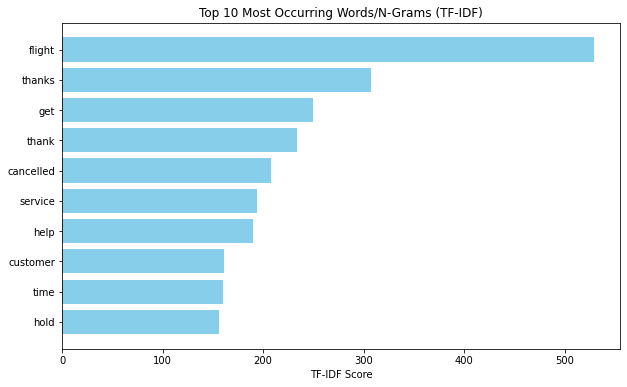

In [8]:
import matplotlib.pyplot as plt

# Unzip the top words and their scores for visualization
words, scores = zip(*top_words)

# Create a bar plot of the most frequent words
plt.figure(figsize=(10, 6))
plt.barh(words, scores, color='skyblue')
plt.xlabel("TF-IDF Score")
plt.title("Top 10 Most Occurring Words/N-Grams (TF-IDF)")
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest scores on top
plt.show()

### 2.3 Top 10 Most Occurring Words in Positive, Neutral, and Negative Tweets

To further analyze the dataset, we extract the top 10 most important words (or n-grams) in each sentiment category: **positive**, **neutral**, and **negative** tweets. This allows us to understand which words are more dominant and contribute most to each sentiment type.

In [9]:
# Function to get top n words for a specific sentiment
def get_top_words_for_sentiment(sentiment, top_n=10):
    # Filter tweets based on the sentiment
    filtered_X = X[tweets['airline_sentiment'] == sentiment]
    
    # Sum the TF-IDF values for each feature (word/n-gram) across all filtered tweets
    tfidf_sum_filtered = filtered_X.sum(axis=0)
    
    # Get the indices of the top n most frequent words/n-grams
    indices_filtered = np.argsort(tfidf_sum_filtered.A1)[::-1][:top_n]
    
    # Get the corresponding feature names and their scores
    top_words_filtered = [(feature_names[i], tfidf_sum_filtered[0, i]) for i in indices_filtered]
    
    return top_words_filtered

# Get top words for positive, neutral, and negative tweets
top_positive = get_top_words_for_sentiment('positive')
top_neutral = get_top_words_for_sentiment('neutral')
top_negative = get_top_words_for_sentiment('negative')

# Print the results
print("Top words in positive tweets:", top_positive)
print("Top words in neutral tweets:", top_neutral)
print("Top words in negative tweets:", top_negative)


Top words in positive tweets: [('thanks', 201.98961709511957), ('thank', 185.56575541939327), ('great', 74.04977697309126), ('flight', 50.95914695023271), ('love', 40.91701391898765), ('much', 40.85290988557015), ('awesome', 39.11641604407156), ('best', 37.03425841188686), ('good', 33.52863001705442), ('guys', 33.423788713676615)]
Top words in neutral tweets: [('flight', 96.85783454551648), ('dm', 60.594186338916735), ('fleek', 54.68144227123885), ('fleet', 53.02046912032871), ('please', 51.02783621814372), ('get', 48.97326256844832), ('thanks', 45.23173743396826), ('flights', 41.063390856950114), ('need', 39.87089610955991), ('help', 38.9365768494016)]
Top words in negative tweets: [('flight', 380.8020382007944), ('get', 179.2731585097608), ('cancelled', 179.1143237752859), ('service', 149.9235455988539), ('hold', 148.65343825283594), ('hours', 147.75251036602663), ('customer', 130.15961623392195), ('help', 129.85106579183238), ('time', 118.62635855972803), ('delayed', 116.53144500000

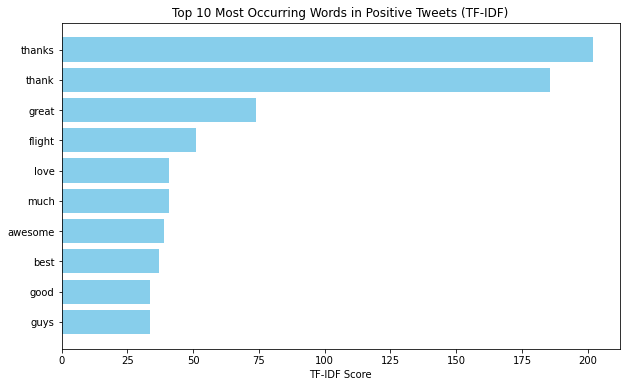

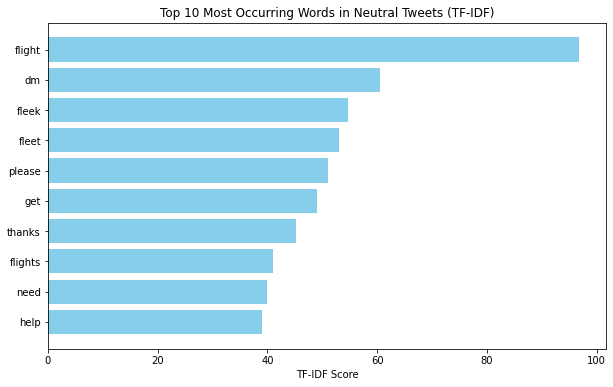

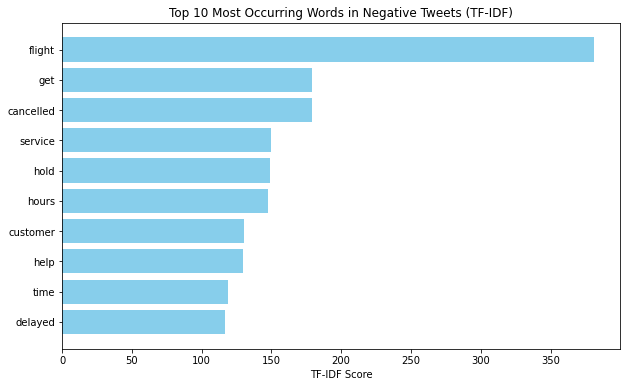

In [10]:
# Function to visualize top words with a bar plot
def plot_top_words(top_words, sentiment):
    words, scores = zip(*top_words)
    
    plt.figure(figsize=(10, 6))
    plt.barh(words, scores, color='skyblue')
    plt.xlabel("TF-IDF Score")
    plt.title(f"Top 10 Most Occurring Words in {sentiment.capitalize()} Tweets (TF-IDF)")
    plt.gca().invert_yaxis()  # Invert the y-axis to have the highest scores on top
    plt.show()

# Visualize the top words for each sentiment
plot_top_words(top_positive, 'positive')
plot_top_words(top_neutral, 'neutral')
plot_top_words(top_negative, 'negative')

## Step 3: Handling Class Imbalance

In the original dataset, there was a significant **class imbalance**. The majority of tweets were classified as **negative**, with fewer classified as **neutral** or **positive**. This imbalance caused the models to favor the majority class (negative) while performing poorly on the minority classes (neutral and positive).

### Effects of Class Imbalance:

1. **Biased Predictions**: With imbalanced data, models tend to predict the majority class (negative tweets) more often, leading to poor classification of the minority classes (neutral and positive).
   
2. **Skewed Accuracy**: Although the overall accuracy might seem decent, the model could perform poorly on minority classes, leading to artificially inflated accuracy without actually classifying all classes effectively.

### Solution: Balancing the Data
To address this class imbalance, we applied two techniques:
- **Random Oversampling**: This method duplicates instances from the minority classes (neutral and positive) to balance the dataset. This technique is simple but risks overfitting by creating duplicate samples.
- **SMOTE (Synthetic Minority Over-sampling Technique)**: SMOTE generates synthetic instances for the minority classes by creating interpolations between existing samples, which introduces more diversity in the dataset and reduces overfitting risk.

In [11]:
# Random Oversampling to balance the class distribution

from imblearn.over_sampling import RandomOverSampler

# Initialize Random Oversampling
ros = RandomOverSampler(random_state=42)

# Apply Random Oversampling to the feature matrix (X) and target labels (y)
X_resampled, y_resampled = ros.fit_resample(X, tweets['airline_sentiment'])

# Display the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(y_resampled.value_counts())

Class distribution after Random Oversampling:
neutral     9178
positive    9178
negative    9178
Name: airline_sentiment, dtype: int64


In [12]:
# Smote to balance the class distribution

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the feature matrix (X) and target labels (y)
X_smote, y_smote = smote.fit_resample(X, tweets['airline_sentiment'])

# Display the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_smote.value_counts())


Class distribution after SMOTE:
neutral     9178
positive    9178
negative    9178
Name: airline_sentiment, dtype: int64


### Impact of Balancing Class Data on Model Performance

After balancing the dataset using both **Random Oversampling** and **SMOTE**, we observed significant improvements in the model’s ability to correctly classify the minority classes (neutral and positive tweets). Key benefits of balancing the dataset include:

1. **Improved Precision and Recall**: The recall and precision for neutral and positive classes improved, allowing the models to better identify these tweets without defaulting to the majority class.
   
2. **More Reliable Performance**: With a balanced dataset, the models performed more reliably across all classes, rather than focusing only on the majority class (negative tweets).

3. **More Balanced Evaluation Metrics**: Metrics such as accuracy and F1-score became more meaningful, reflecting the models' improved performance on all classes rather than just the majority class.

### Decision: Using Both SMOTE and Random Oversampling

After evaluating both **Random Oversampling** and **SMOTE**, we decided to continue using both techniques for model training. By using both methods, we aim to compare their results and select the one that performs best in terms of accuracy, recall, precision, and F1-score across all classes.

## Step 4: Model Selection and Evaluation

With the dataset balanced using both **Random Oversampling** and **SMOTE**, we will now train and evaluate several machine learning models. The models we will experiment with include:
- **Logistic Regression**: A widely-used linear model for classification tasks.
- **Naive Bayes**: A probabilistic classifier often used for text classification.
- **Support Vector Machine (SVM)**: A powerful classifier that finds the hyperplane that best separates the classes.
- **Random Forest**: An ensemble method that builds multiple decision trees and averages their results.

We will evaluate each model using key performance metrics:
- **Accuracy**: The proportion of correctly classified instances.
- **Precision**: The proportion of true positive predictions out of all positive predictions.
- **Recall**: The proportion of true positive predictions out of all actual positive instances.
- **F1-score**: The harmonic mean of precision and recall, providing a balanced metric for imbalanced datasets.

In [15]:
# Training models with Random Oversampling

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the resampled data from Random Oversampling into training and test sets
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Logistic Regression with Random Oversampling
logreg_ros = LogisticRegression(max_iter=1000)
logreg_ros.fit(X_train_ros, y_train_ros)
y_pred_logreg_ros = logreg_ros.predict(X_test_ros)
print("Logistic Regression (ROS) Accuracy:", accuracy_score(y_test_ros, y_pred_logreg_ros))
print(classification_report(y_test_ros, y_pred_logreg_ros))

#Naive Bayes with Random Oversampling
nb_ros = MultinomialNB()
nb_ros.fit(X_train_ros, y_train_ros)
y_pred_nb_ros = nb_ros.predict(X_test_ros)
print("Naive Bayes (ROS) Accuracy:", accuracy_score(y_test_ros, y_pred_nb_ros))
print(classification_report(y_test_ros, y_pred_nb_ros))

# SVM with Random Oversampling
svm_ros = SVC(kernel='linear', random_state=42)
svm_ros.fit(X_train_ros, y_train_ros)
y_pred_svm_ros = svm_ros.predict(X_test_ros)
print("SVM (ROS) Accuracy:", accuracy_score(y_test_ros, y_pred_svm_ros))
print(classification_report(y_test_ros, y_pred_svm_ros))

# Random Forest with Random Oversampling
rf_ros = RandomForestClassifier(random_state=42)
rf_ros.fit(X_train_ros, y_train_ros)
y_pred_rf_ros = rf_ros.predict(X_test_ros)
print("Random Forest (ROS) Accuracy:", accuracy_score(y_test_ros, y_pred_rf_ros))
print(classification_report(y_test_ros, y_pred_rf_ros))

Logistic Regression (ROS) Accuracy: 0.8549119302705648
              precision    recall  f1-score   support

    negative       0.88      0.80      0.84      1895
     neutral       0.79      0.86      0.82      1786
    positive       0.90      0.91      0.91      1826

    accuracy                           0.85      5507
   macro avg       0.86      0.86      0.85      5507
weighted avg       0.86      0.85      0.85      5507

Naive Bayes (ROS) Accuracy: 0.831668785182495
              precision    recall  f1-score   support

    negative       0.84      0.82      0.83      1895
     neutral       0.80      0.77      0.79      1786
    positive       0.85      0.90      0.87      1826

    accuracy                           0.83      5507
   macro avg       0.83      0.83      0.83      5507
weighted avg       0.83      0.83      0.83      5507

SVM (ROS) Accuracy: 0.8596331941165789
              precision    recall  f1-score   support

    negative       0.88      0.80      0.84

In [16]:
# Training models with SMOTE

# Split the resampled data from SMOTE into training and test sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Logistic Regression with SMOTE
logreg_smote = LogisticRegression(max_iter=1000)
logreg_smote.fit(X_train_smote, y_train_smote)
y_pred_logreg_smote = logreg_smote.predict(X_test_smote)
print("Logistic Regression (SMOTE) Accuracy:", accuracy_score(y_test_smote, y_pred_logreg_smote))
print(classification_report(y_test_smote, y_pred_logreg_smote))

# Naive Bayes with SMOTE
nb_smote = MultinomialNB()
nb_smote.fit(X_train_smote, y_train_smote)
y_pred_nb_smote = nb_smote.predict(X_test_smote)
print("Naive Bayes (SMOTE) Accuracy:", accuracy_score(y_test_smote, y_pred_nb_smote))
print(classification_report(y_test_smote, y_pred_nb_smote))

# SVM with SMOTE
svm_smote = SVC(kernel='linear', random_state=42)
svm_smote.fit(X_train_smote, y_train_smote)
y_pred_svm_smote = svm_smote.predict(X_test_smote)
print("SVM (SMOTE) Accuracy:", accuracy_score(y_test_smote, y_pred_svm_smote))
print(classification_report(y_test_smote, y_pred_svm_smote))

# Random Forest with SMOTE
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_smote.predict(X_test_smote)
print("Random Forest (SMOTE) Accuracy:", accuracy_score(y_test_smote, y_pred_rf_smote))
print(classification_report(y_test_smote, y_pred_rf_smote))

Logistic Regression (SMOTE) Accuracy: 0.8195024514254585
              precision    recall  f1-score   support

    negative       0.89      0.80      0.84      1895
     neutral       0.72      0.87      0.79      1786
    positive       0.87      0.79      0.83      1826

    accuracy                           0.82      5507
   macro avg       0.83      0.82      0.82      5507
weighted avg       0.83      0.82      0.82      5507

Naive Bayes (SMOTE) Accuracy: 0.8191392772834574
              precision    recall  f1-score   support

    negative       0.78      0.85      0.81      1895
     neutral       0.81      0.73      0.77      1786
    positive       0.87      0.87      0.87      1826

    accuracy                           0.82      5507
   macro avg       0.82      0.82      0.82      5507
weighted avg       0.82      0.82      0.82      5507

SVM (SMOTE) Accuracy: 0.8162338841474487
              precision    recall  f1-score   support

    negative       0.89      0.82   

## Model Comparison

We trained and evaluated several models using both **Random Oversampling (ROS)** and **SMOTE** techniques to address the class imbalance in the dataset. The models we compared were:
- **Logistic Regression**
- **Naive Bayes**
- **Support Vector Machine (SVM)**
- **Random Forest**

### Results Overview:

| Model                    | Oversampling Technique | Accuracy | Macro Avg F1 Score |
|--------------------------|------------------------|----------|--------------------|
| Logistic Regression       | ROS                    | 85.5%    | 0.85               |
| Naive Bayes               | ROS                    | 83.2%    | 0.83               |
| SVM                       | ROS                    | 86.0%    | 0.86               |
| Random Forest             | ROS                    | 92.7%    | 0.93               |
| Logistic Regression       | SMOTE                  | 81.9%    | 0.82               |
| Naive Bayes               | SMOTE                  | 81.9%    | 0.82               |
| SVM                       | SMOTE                  | 81.6%    | 0.82               |
| Random Forest             | SMOTE                  | 87.8%    | 0.88               |

### Model Selection:

Based on the results, **Random Forest (ROS)** provided the best overall performance, with an accuracy of **92.7%** and a macro-average F1-score of **0.93**. This model was selected due to its balanced performance across all classes, outperforming the other models in terms of both precision and recall.

### Confusion Matrix - Random Forest (ROS)

The confusion matrix allows us to visualize the performance of the Random Forest model by showing the counts of true positive, false positive, true negative, and false negative classifications for each sentiment class (negative, neutral, positive).

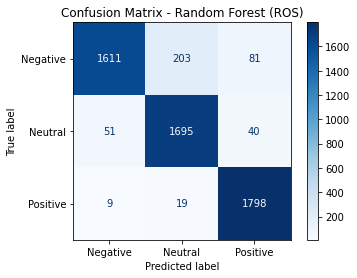

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions for the test set
y_pred_rf_ros = rf_ros.predict(X_test_ros)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_ros, y_pred_rf_ros)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest (ROS)")
plt.show()

### Feature Importance - Random Forest (ROS)

Random Forest models allow us to identify the most important features (words) used in making predictions. Below, we visualize the top 10 most important features that influenced the model's predictions.

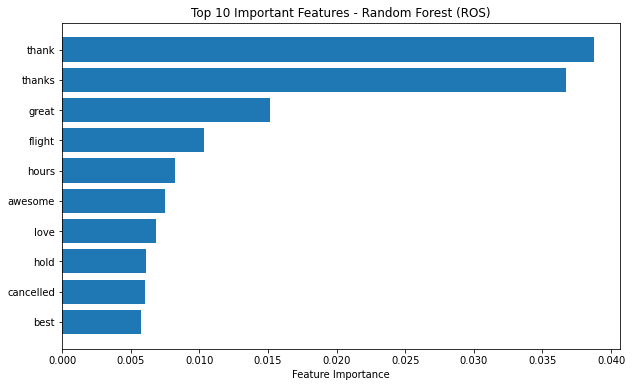

In [18]:

# Get feature importances from the random forest model
feature_importances = rf_ros.feature_importances_

# Sort feature importances in descending order and get the top 10 features
indices = np.argsort(feature_importances)[-10:]

# Get the corresponding feature names from the TF-IDF vectorizer
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features - Random Forest (ROS)")
plt.show()

### Cross-Validation - Random Forest (ROS)

To ensure that our chosen model generalizes well and isn't overfitting to the training data, we perform **5-fold cross-validation**. This process will split the data into five parts, train the model on four parts, and test it on the remaining part, rotating through all five combinations.

The goal of cross-validation is to assess the model's performance on unseen data and confirm that it performs consistently across different subsets of the data.

Below, we run cross-validation for the **Random Forest (ROS)** model.

In [19]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the best-performing model (Random Forest with ROS)
rf_model_cv = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_model_cv, X_resampled, y_resampled, cv=5)  # 5-fold cross-validation

# Print the cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.91338297 0.91065916 0.92155439 0.9522426  0.93861242]
Mean Cross-Validation Score: 0.9272903073333143


### Cross-Validation Results Evaluation

To validate the generalization capability of the **Random Forest (ROS)** model, we performed **5-fold cross-validation**. This process helps ensure that the model's performance is not overly dependent on the specific training set and can generalize well to unseen data.

The cross-validation scores were as follows:

- **Fold 1**: 91.34%
- **Fold 2**: 91.07%
- **Fold 3**: 92.16%
- **Fold 4**: 95.22%
- **Fold 5**: 93.86%

The **mean cross-validation score** is **92.73%**, which is consistent with the original accuracy of the model on the test set (92.68%). This consistency across different folds indicates that the model generalizes well to different subsets of data and is not overfitting to a particular fold.

### Evaluation:
The cross-validation results further confirm that the **Random Forest (ROS)** model performs reliably and consistently, with strong generalization capability. This reinforces our decision to select this model as the final classifier for sentiment analysis in this project.

## Step 5: Conclusion

In this project, we successfully developed a sentiment analysis classifier for airline tweets, aimed at categorizing tweets into **negative**, **neutral**, or **positive** sentiments.

### Model Comparison:
We evaluated four different machine learning models—**Logistic Regression**, **Naive Bayes**, **Support Vector Machine (SVM)**, and **Random Forest**—using both **Random Oversampling (ROS)** and **SMOTE** techniques to address the class imbalance in the dataset. After comparing the models, we found that **Random Forest (ROS)** achieved the best overall performance with an accuracy of **92.68%** and a macro-average F1-score of **0.93**.

### Cross-Validation:
To ensure that our model generalizes well and is not overfitting, we performed **5-fold cross-validation** on the selected **Random Forest (ROS)** model. The cross-validation results produced a mean accuracy of **92.73%**, confirming the model’s reliability and consistency across different subsets of the data.

### Challenges and Limitations:
Although we initially intended to use **Grid Search** for hyperparameter tuning, resource constraints prevented us from completing this step. However, given the strong performance of the model, we opted to proceed with the current hyperparameters. In future iterations, more extensive hyperparameter tuning could further enhance the model’s performance.

### Future Work:
In addition to hyperparameter tuning, future improvements could include:
- Exploring more advanced data augmentation techniques.
- Investigating feature engineering approaches to further optimize the model.
- Applying this model to a broader dataset or different domains to test its adaptability.

Overall, the **Random Forest (ROS)** model demonstrates strong generalization capabilities and provides reliable sentiment classification for social media data, making it a suitable solution for real-world applications in social media analysis or customer feedback monitoring.